In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
X = iris.data

In [6]:
Y = iris.target

In [7]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [9]:
iris_target = DataFrame(Y, columns=['Species'])

In [10]:
iris_target

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [11]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [12]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [13]:
iris_target

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
5,Setosa
6,Setosa
7,Setosa
8,Setosa
9,Setosa


In [14]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [15]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


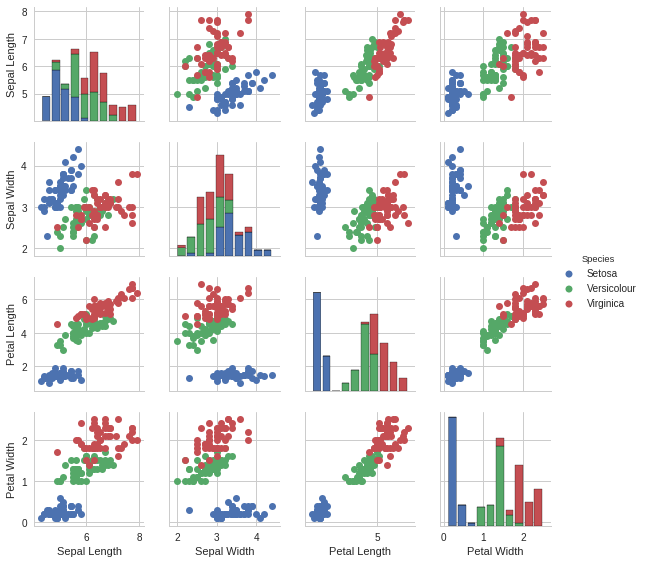

In [16]:
sns.pairplot(iris, hue='Species', size=2)

TypeError: argument 2 to map() must support iteration

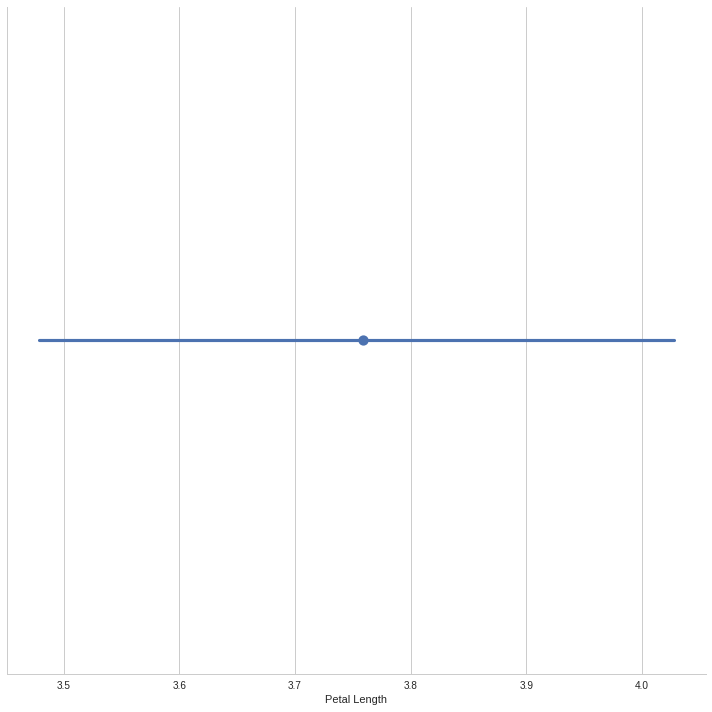

In [17]:
sns.factorplot('Petal Length', data=iris, hue='Species', size=10)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [19]:
logreg = LogisticRegression()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

In [21]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
from sklearn import metrics

In [23]:
Y_pred = logreg.predict(X_test)

In [24]:
print metrics.accuracy_score(Y_test, Y_pred)

0.933333333333


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=6)

In [27]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [28]:
Y_pred = knn.predict(X_test)

In [29]:
print metrics.accuracy_score(Y_test, Y_pred)

0.95


In [30]:
knn2 = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
Y_pred2 = knn2.predict(X_test)

In [33]:
print metrics.accuracy_score(Y_test, Y_pred2)

0.966666666667


In [34]:
k_range = range(1,21)

In [35]:
accuracy = []

In [36]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

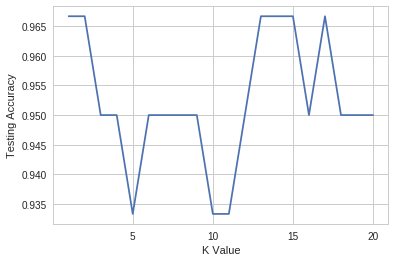

In [37]:
plt.plot(k_range, accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')